<a href="https://colab.research.google.com/github/JulieaMammen/Seattle-Weather/blob/main/JulieMammen_DATA_3320_Seattle_St_Louis_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The problem this notebook aims to address is the question of whether it rain more in Seattle, WA than in St. Louis, MO.

The purpose of this notebook is to be able to analyze the joined data frame of the Seattle and St. Louis data sets to answer the question of whether it rains more in Seattle or St. Louis.

## Data Source

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their website to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022).

I have already obtained the data. The data are available at this [github repository](https://github.com/JulieaMammen/Seattle-Weather).

The raw data is contained int he files called seattle_rain.csv and stl_rain.csv.

The cleaned data is in the clean_seattle_stl_weather.csv

Lastly, the colab notebook that contains the steps to prepare the data is in the JulieMammen_DATA_3320_Seattle_St_Louis_Data_Preparation.ipynb

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [2]:
df_clean_weather = pd.read_csv('https://raw.githubusercontent.com/JulieaMammen/Seattle-Weather/main/clean_seattle_stl_weather.csv')

##### $\rightarrow$ Review the contents of the data set.

In [3]:
df_clean_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3652 non-null   object 
 1   city           3652 non-null   object 
 2   precipitation  3652 non-null   float64
 3   day_of_year    3652 non-null   int64  
 4   month          3652 non-null   int64  
 5   year           3652 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 171.3+ KB


In [4]:
df_clean_weather.head()

,date,city,precipitation,day_of_year,month,year
0,2018-01-01,STL,0.0,1,1,2018
1,2018-01-02,STL,0.0,2,1,2018
2,2018-01-03,STL,0.0,3,1,2018
3,2018-01-04,STL,0.0,4,1,2018
4,2018-01-05,STL,0.0,5,1,2018


In [5]:
df_clean_weather.tail()

,date,city,precipitation,day_of_year,month,year
3647,2022-12-27,SEA,0.78,361,12,2022
3648,2022-12-28,SEA,0.40,362,12,2022
3649,2022-12-29,SEA,0.03,363,12,2022
3650,2022-12-30,SEA,0.62,364,12,2022
3651,2022-12-31,SEA,0.17,365,12,2022


## State your questions

The overall problem is to compare how much it rains in Seattle and St. Louis. To answer this general problem, you will need to ask specific questions about the data.


To get a better understanding and to be able to compare how much it rains in Seattle and St. Louis, we need to narrow down what exactly we want to look into and analyze. 

- How many days does it not rain in Seattle and St. Louis?
- How many days does it rain in Seattle and St. Louis?
- Are there seasonal differences in the amount of rain between Seattle and St. Louis?
- How does monthly or yearly rain look between St. Louis and Seattle?

## Analysis

We can first take a look at the monthly projections of rain across these years. 

([<matplotlib.axis.XTick at 0x7f1c6c58c6a0>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sept'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

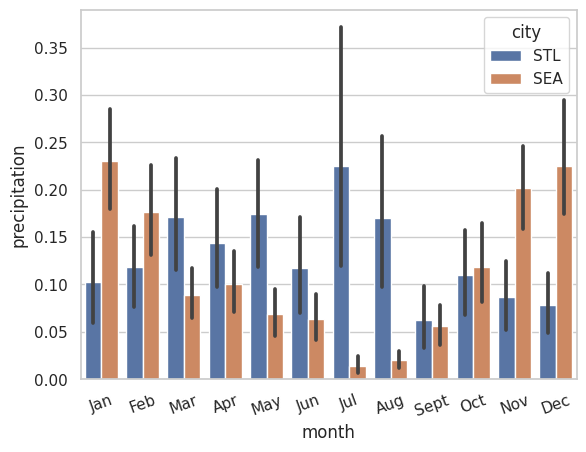

In [8]:
sns.barplot(data=df_clean_weather, x='month', y='precipitation', hue='city')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=['Jan', "Feb", 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=20)

By looking at this graph, it seems to illustrate that on average it rains more monthly in St. Louis. However, we can do some additional analysis to see that it seems to also be related to seasons as well. As seen in the bar graph above, in the months of March to September, it seems to rain more monthly in St. Louis. However, from October to February, it seems to rain more monthly in Seattle. From this, it seems to imply that during Fall/Winter it seems to rain more monthly in September, however, in Spring/Summer, it seems to rain more monthly in St. Louis.

Now we can look at how many days it has not rained in Seattle and St. Louis. 

To do this, first we want to isolate and grab the days in the data frame in which the precipitation is 0.

In [9]:
df_no_rain = df_clean_weather.loc[df_clean_weather['precipitation'] == 0]
df_no_rain

,date,city,precipitation,day_of_year,month,year
0,2018-01-01,STL,0.0,1,1,2018
1,2018-01-02,STL,0.0,2,1,2018
2,2018-01-03,STL,0.0,3,1,2018
3,2018-01-04,STL,0.0,4,1,2018
4,2018-01-05,STL,0.0,5,1,2018
...,...,...,...,...,...,...
3614,2022-11-24,SEA,0.0,328,11,2022
3622,2022-12-02,SEA,0.0,336,12,2022
3624,2022-12-04,SEA,0.0,338,12,2022
3635,2022-12-15,SEA,0.0,349,12,2022


Now that we have the days of which it did not rain in St. Louis and Seattle, we can graph the number of days in which it has not rained.

<Axes: xlabel='City', ylabel='Number of Days'>

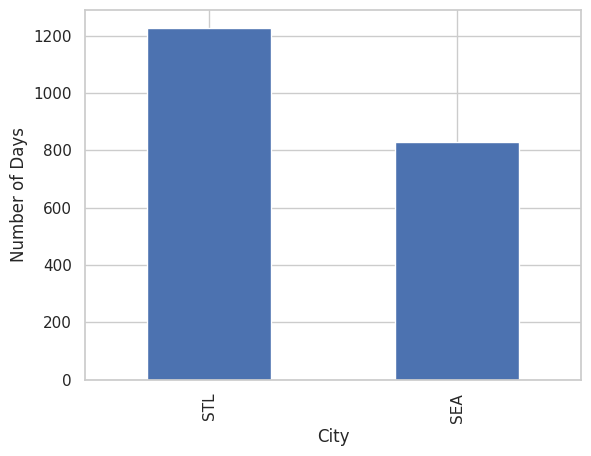

In [18]:
df_no_rain['city'].value_counts().plot(kind = 'bar', xlabel= 'City', ylabel= 'Number of Days')

From analyzing this graph, it can be seen that it seem to have less days in which it does not rain in Seattle while St. Louis it has more days where it does not rain. This seems to insinuate the notion that St. Louis might not be as rainy as Seattle is.

The next step now would be to see how many days it has rained heavily in both cities. This can give a better understanding for us to understand whether it truly rains more on average or if it is instead that perhaps in a give city it might rain less, but when it rains it rains a lot.

Now we will look at the data in which the precipitation is 1 inch or higher. 

In [19]:
df_rain = df_clean_weather.loc[df_clean_weather['precipitation'] >= 1.0]
df_rain

,date,city,precipitation,day_of_year,month,year
50,2018-02-20,STL,1.04,51,2,2018
54,2018-02-24,STL,1.73,55,2,2018
77,2018-03-19,STL,1.43,78,3,2018
84,2018-03-26,STL,1.01,85,3,2018
85,2018-03-27,STL,1.12,86,3,2018
...,...,...,...,...,...,...
3345,2022-02-28,SEA,1.89,59,2,2022
3346,2022-03-01,SEA,1.03,60,3,2022
3447,2022-06-10,SEA,1.07,161,6,2022
3620,2022-11-30,SEA,1.26,334,11,2022


<Axes: xlabel='City', ylabel='Number of Days'>

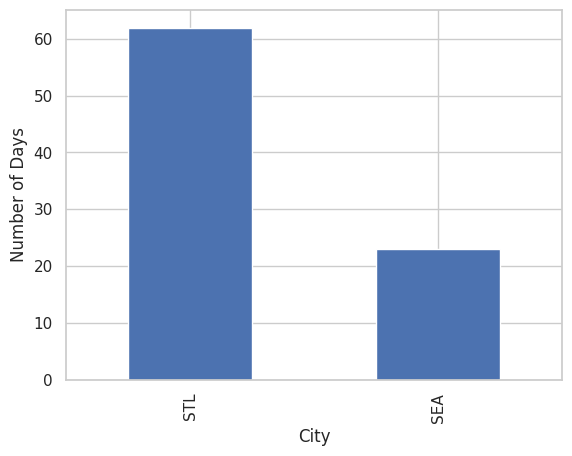

In [20]:
df_rain['city'].value_counts().plot(kind = 'bar', xlabel= 'City', ylabel= 'Number of Days')

From this plot, it implies that much heavier rains seem to fall in St. Louis compared to Seattle. As we can that the number of days in which it rains 1 inch or more is substantially higher than in Seattle.

Therefore, this can imply that it tends to rain more daily in Seattle, however, it rains much harder in St. Louis. 

We can look at a yearly overview, to see if the data plotted above seems to be consistent and follow this presumed pattern.

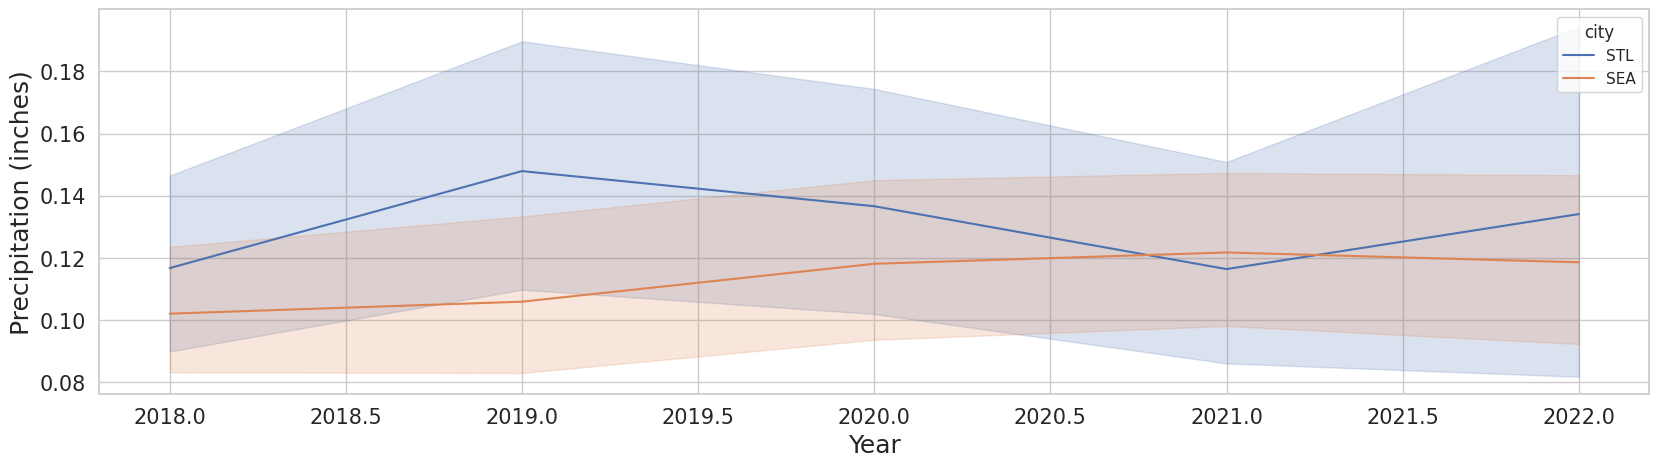

In [23]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df_clean_weather, x = 'year', y = 'precipitation', hue='city')

plt.xlabel('Year', fontsize = 18)
plt.ylabel('Precipitation (inches)', fontsize = 18)

plt.tick_params(labelsize=15);

By analyzing this graph it seems to show the results gathered from the previous graphs. It seems to show the trend that suggests it rains more in St. Louis, however this plot also illustrates the sharp changes in the rate of precipitation for St. louis. However, when looking at the Seattle line plotted it seems to be at more consistent precipitation rates across the year, suggest more constant rain in Seattle.

## Conclusion

Therefore, by analyzing all these graphs it can be seen that it perhaps rains more in Seattle, but solely when it comes down to the number of days it rains. However, when analyzing the data there seems to be much heavier rainfall in St. Louis. Therefore, depending on which measure we classify by either side could be argued. Seattle has more consistent rainy days across the years while St. Louis has much more days in which it does not rain, however, when it does rain in St. Louis it typically seems that it tends to rain much harder in St. Louis than in Seattle.